In [105]:
import pandas as pd

Читаем метаданные корпуса, подправленные вручную и дополненные автоматически (паттерны, кол-ва токенов итд)

In [106]:
df = pd.read_csv('./corpus-augmented.csv',sep='\t',index_col=0)

## Метаданные корпуса:

`filename` - строка, полное название текста 

#### Свойства текстов
`date` - строка, дата подписания/написания/обращения 

`authors` - массив, автор документа или выступающий/подписавшийся ("ответственный за документ")

`genres` – массив, все жанровые теги (манифест/выступление/фрагмент)

`names` - массив, заявленное название (иногда больше чем одно напр. ['резолюция всесоюзной конференции', 'рекорды посевов'])

`topics` - массив, темы документа, заявленные в названии или размеченные вручную где возможно. где невозможно выделить одну большую тему - копия столбца names (считаем что документ с самостоятельной маленькой темой из названия)

#### Бинарные категории текстов:
`multiple_authors` - заявлено ли групповое авторство напр. декрет ленина + сталина – да; резолюция съезда - да; послание путина федеральному собранию – нет (считаем что коллективное авторство не заявлено)

`leader_in_author` - заявлено ли что лидер в авторах документа/в подписавшихся/выступает ли. список лидеров ссср [отсюда](https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D1%80%D1%83%D0%BA%D0%BE%D0%B2%D0%BE%D0%B4%D0%B8%D1%82%D0%B5%D0%BB%D0%B5%D0%B9_%D0%A1%D0%A1%D0%A1%D0%A0) - включаем маленкова. TODO подумать считается ли ельцин из 1990 уже руководителем 

`is_written_text` - текст публикуется/доставляется в письменном виде

`addressed_to_people` - непосредственное обращение к широкой аудитории (ко всем гражданам/ко всем рабочим/к казакам). если указано обратное то False. напр. манифест -- [да](https://ru.wikipedia.org/wiki/%D0%92%D1%8B%D1%81%D0%BE%D1%87%D0%B0%D0%B9%D1%88%D0%B8%D0%B9_%D0%BC%D0%B0%D0%BD%D0%B8%D1%84%D0%B5%D1%81%D1%82), послание федеральному собранию - нет

`regular_occasion` -- съезды/конференции/совет/послание фс/инаугурационная речь

`has_major_topic` - заявлена/очевидная единственная тема (см. `topics`)

`is_fragment` -- является ли текст извлечением из оригинального документа/речи

`distorted` - очевидные проблемы в ocr и проч 

#### Аггрегирующие признаки:
`year` - год текста

`period` - исторический период, связанный с правлением лидера страны

`period-denser` - более частые исторические периоды (напр довоенный сталин и послевоенный сталин)

`full_pattern` -- складывается из всех бинарных признаков 

`pattern` -- паттерны в модели где мы принимаем что жанр для наших целей полностью определяется признаками: `multiple_authors`, `leader_in_author`, `is_written_text`, `addressed_to_people` (последнее неочевидно, TODO посмотреть на экспериментах, возможно получится упростить схему удалив addressed_to_people)

#### Остальное
`token_count` - количество токенов (spacy)

`filename_raw` - вспомонательное поле для обхода корпуса



In [107]:
df

,filename,date,authors,genres,names,topics,multiple_authors,leader_in_authors,is_written_text,addressed_to_people,...,has_major_topic,pattern,year,is_fragment,distorted,full_pattern,token_count,filename_raw,period,period-denser
0,1894.10.20_николай ii_манифест_о восшествии на...,1894.10.20,['николай ii'],['манифест'],['о восшествии на престол'],['о восшествии на престол'],False,True,True,True,...,False,111,1894,False,False,1110000,478,1894.10.20_николай-ii_манифест_о-восшествии-на...,николай ii,николай ii
1,1896.01.01_николай ii_манифест_коронование,1896.01.01,['николай ii'],['манифест'],['коронование'],['коронование'],False,True,True,True,...,False,111,1896,False,False,1110000,202,1896.01.01_николай-ii_манифест_коронование.txt,николай ii,николай ii
2,1899.02.03_николай ii_манифест_законы княжеств...,1899.02.03,['николай ii'],['манифест'],['законы княжества финляндского'],['законы княжества финляндского'],False,True,True,True,...,False,111,1899,False,False,1110000,455,1899.02.03_николай-ii_манифест_законы-княжеств...,николай ii,николай ii
3,1903.02.26_николай ii_манифест_усовершенствова...,1903.02.26,['николай ii'],['манифест'],['усовершенствование государственной власти'],['усовершенствование государственной власти'],False,True,True,True,...,False,111,1903,False,False,1110000,679,1903.02.26_николай-ii_манифест_усовершенствова...,николай ii,николай ii
4,1904.01.27_николай ii_манифест_об открытии вое...,1904.01.27,['николай ii'],['манифест'],['об открытии военных действий против японии'],['русско японская война 1904'],False,True,True,True,...,True,111,1904,False,False,1110100,399,1904.01.27_николай-ii_манифест_об-открытии-вое...,николай ii,николай ii
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,2024.02.29_путин_выступление.послание_послание...,2024.02.29,['путин'],"['выступление', 'послание']",['послание федеральному собранию'],['послание федеральному собранию'],False,True,False,False,...,False,100,2024,False,False,1001000,15982,2024.02.29_путин_выступление.послание_послание...,путин 2012-2024,путин 2018-2024
358,2024.03.14_путин_выступление.обращение к гражд...,2024.03.14,['путин'],"['выступление', 'обращение к гражданам', 'тв']",['обращение к гражданам'],['выборы 2024'],False,True,False,True,...,True,101,2024,False,False,1011100,512,2024.03.14_путин_выступление.обращение-к-гражд...,путин 2012-2024,путин 2018-2024
359,2024.03.21_путин_выступление.обращение к гражд...,2024.03.21,['путин'],"['выступление', 'обращение к гражданам', 'тв']",['обращение к гражданам'],"['выборы 2024', 'итоги выборов']",False,True,False,True,...,True,101,2024,False,False,1011100,384,2024.03.21_путин_выступление.обращение-к-гражд...,путин 2012-2024,путин 2018-2024
360,2024.03.23_путин_выступление.обращение к гражд...,2024.03.23,['путин'],"['выступление', 'обращение к гражданам', 'тв']",['обращение к гражданам'],['теракт в крокусе'],False,True,False,True,...,True,101,2024,False,False,1010100,667,2024.03.23_путин_выступление.обращение-к-гражд...,путин 2012-2024,путин 2018-2024


#### # поправим типы данных в массивах и булевых полях

In [108]:
import ast


In [109]:
def list_in_string_to_list(list_wrapped_in_string):
    return ast.literal_eval(list_wrapped_in_string)

In [110]:
df['authors'] = df['authors'].apply(list_in_string_to_list)
df['genres'] = df['genres'].apply(list_in_string_to_list)
df['names'] = df['names'].apply(list_in_string_to_list)
df['topics'] = df['topics'].apply(list_in_string_to_list)
df

,filename,date,authors,genres,names,topics,multiple_authors,leader_in_authors,is_written_text,addressed_to_people,...,has_major_topic,pattern,year,is_fragment,distorted,full_pattern,token_count,filename_raw,period,period-denser
0,1894.10.20_николай ii_манифест_о восшествии на...,1894.10.20,[николай ii],[манифест],[о восшествии на престол],[о восшествии на престол],False,True,True,True,...,False,111,1894,False,False,1110000,478,1894.10.20_николай-ii_манифест_о-восшествии-на...,николай ii,николай ii
1,1896.01.01_николай ii_манифест_коронование,1896.01.01,[николай ii],[манифест],[коронование],[коронование],False,True,True,True,...,False,111,1896,False,False,1110000,202,1896.01.01_николай-ii_манифест_коронование.txt,николай ii,николай ii
2,1899.02.03_николай ii_манифест_законы княжеств...,1899.02.03,[николай ii],[манифест],[законы княжества финляндского],[законы княжества финляндского],False,True,True,True,...,False,111,1899,False,False,1110000,455,1899.02.03_николай-ii_манифест_законы-княжеств...,николай ii,николай ii
3,1903.02.26_николай ii_манифест_усовершенствова...,1903.02.26,[николай ii],[манифест],[усовершенствование государственной власти],[усовершенствование государственной власти],False,True,True,True,...,False,111,1903,False,False,1110000,679,1903.02.26_николай-ii_манифест_усовершенствова...,николай ii,николай ii
4,1904.01.27_николай ii_манифест_об открытии вое...,1904.01.27,[николай ii],[манифест],[об открытии военных действий против японии],[русско японская война 1904],False,True,True,True,...,True,111,1904,False,False,1110100,399,1904.01.27_николай-ii_манифест_об-открытии-вое...,николай ii,николай ii
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,2024.02.29_путин_выступление.послание_послание...,2024.02.29,[путин],"[выступление, послание]",[послание федеральному собранию],[послание федеральному собранию],False,True,False,False,...,False,100,2024,False,False,1001000,15982,2024.02.29_путин_выступление.послание_послание...,путин 2012-2024,путин 2018-2024
358,2024.03.14_путин_выступление.обращение к гражд...,2024.03.14,[путин],"[выступление, обращение к гражданам, тв]",[обращение к гражданам],[выборы 2024],False,True,False,True,...,True,101,2024,False,False,1011100,512,2024.03.14_путин_выступление.обращение-к-гражд...,путин 2012-2024,путин 2018-2024
359,2024.03.21_путин_выступление.обращение к гражд...,2024.03.21,[путин],"[выступление, обращение к гражданам, тв]",[обращение к гражданам],"[выборы 2024, итоги выборов]",False,True,False,True,...,True,101,2024,False,False,1011100,384,2024.03.21_путин_выступление.обращение-к-гражд...,путин 2012-2024,путин 2018-2024
360,2024.03.23_путин_выступление.обращение к гражд...,2024.03.23,[путин],"[выступление, обращение к гражданам, тв]",[обращение к гражданам],[теракт в крокусе],False,True,False,True,...,True,101,2024,False,False,1010100,667,2024.03.23_путин_выступление.обращение-к-гражд...,путин 2012-2024,путин 2018-2024


In [111]:
type(df['regular_occasion'].iloc[0])

numpy.bool_

In [112]:
def bool_str_to_int_str(bool_val):
    return str(bool_val.astype(int))

## Аудит корпуса

#### 1. по времени

1.1 по годам

In [113]:
# в средним текстов каждый год

df.groupby('year').count()['filename'].mean()

4.469135802469136

In [114]:
# медиана текстов каждый год

df.groupby('year').count()['filename'].median()

3.0

In [115]:
# среднее годовых сумм токенов 

df.groupby('year')['token_count'].sum().mean()


29476.53086419753

In [116]:
# медиана годовых сумм токенов 

df.groupby('year')['token_count'].sum().median()


11633.0

In [117]:
# в эти года больше всего текстов:

df.groupby('year').count()['filename'].sort_values(ascending=False).head(10)

year
1918    58
1917    39
1988    10
2020    10
1922    10
1924     9
1986     9
1923     9
1991     8
1941     7
Name: filename, dtype: int64

In [118]:
# в эти года больше всего токенов:

df.groupby('year')['token_count'].sum().sort_values(ascending=False).head(10)

year
1986    344934
1966    234199
1971    224831
1988    195716
1990    157892
1952     90797
1961     88554
1976     66655
1959     59191
2020     50702
Name: token_count, dtype: int64

#### распределение количества текстов по годам

<Axes: xlabel='year'>

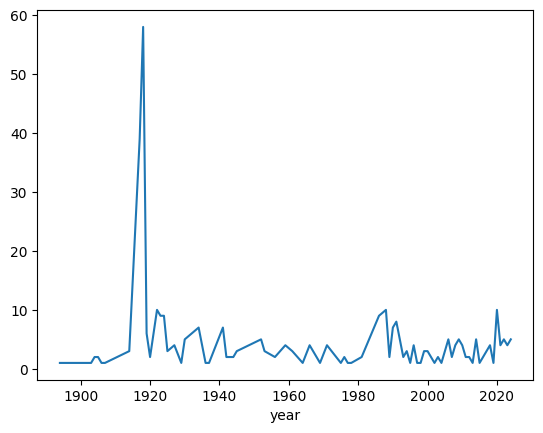

In [119]:
df.groupby('year').count()['filename'].plot.line()

#### распределение суммы токенов по годам

<Axes: xlabel='year'>

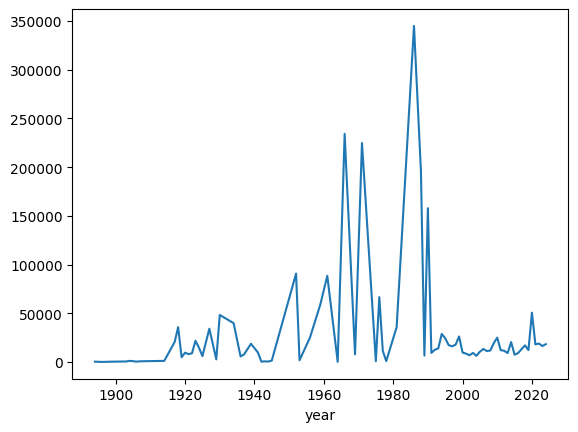

In [120]:
df.groupby('year')['token_count'].sum().plot.line()

1.2 по периодам

In [121]:
# в средним текстов каждый период

df.groupby('period').count()['filename'].mean()

30.166666666666668

In [122]:
# медиана текстов каждый период

df.groupby('period').count()['filename'].median()

18.5

In [123]:
# среднее сумм токенов за период

df.groupby('period')['token_count'].sum().mean()


198966.58333333334

In [124]:
# медиана сумм токенов за период

df.groupby('period')['token_count'].sum().median()


134911.5

In [125]:
# в эти периоды больше всего текстов:

df.groupby('period').count()['filename'].sort_values(ascending=False).head(10)

period
ленин              120
сталин              57
путин 2012-2024     43
горбачев            31
ельцин              25
путин 2000-2008     21
брежнев             16
медведев            14
николай ii          14
хрущев              10
Name: filename, dtype: int64

In [126]:
# в эти периоды больше всего токенов:

df.groupby('period')['token_count'].sum().sort_values(ascending=False).head(10)

period
горбачев           708348
брежнев            583204
сталин             283637
путин 2012-2024    210420
хрущев             173138
ельцин             164289
ленин              105534
путин 2000-2008     78238
медведев            67869
николай ii           6972
Name: token_count, dtype: int64

In [127]:
df.groupby('period')['date'].max().sort_values().index.to_list(
)

['николай ii',
 'временное правительство',
 'ленин',
 'сталин',
 'маленков',
 'хрущев',
 'брежнев',
 'горбачев',
 'ельцин',
 'путин 2000-2008',
 'медведев',
 'путин 2012-2024']

In [128]:
by_period = df.groupby('period').count().reindex(['николай ii',
 'временное правительство',
 'ленин',
 'сталин',
 'маленков',
 'хрущев',
 'брежнев',
 'горбачев',
 'ельцин',
 'путин 2000-2008',
 'медведев',
 'путин 2012-2024'])

In [129]:
by_period

,filename,date,authors,genres,names,topics,multiple_authors,leader_in_authors,is_written_text,addressed_to_people,regular_occasion,has_major_topic,pattern,year,is_fragment,distorted,full_pattern,token_count,filename_raw,period-denser
period,,,,,,,,,,,,,,,,,,,,
николай ii,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
временное правительство,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
ленин,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120
сталин,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57
маленков,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
хрущев,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
брежнев,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
горбачев,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31
ельцин,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25


<Axes: xlabel='period'>

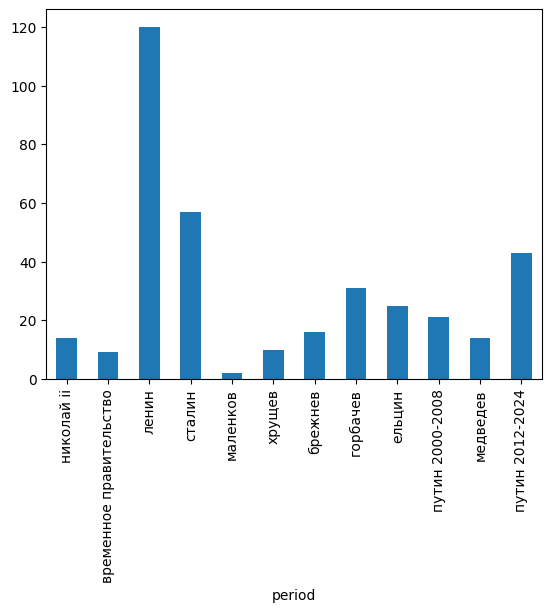

In [130]:
# количества текстов за периоды

by_period['filename'].plot.bar()

In [131]:
by_period_tc = df.groupby('period')['token_count'].sum().reindex(['николай ii',
 'временное правительство',
 'ленин',
 'сталин',
 'маленков',
 'хрущев',
 'брежнев',
 'горбачев',
 'ельцин',
 'путин 2000-2008',
 'медведев',
 'путин 2012-2024'])

by_period_tc

period
николай ii                   6972
временное правительство      4570
ленин                      105534
сталин                     283637
маленков                     1380
хрущев                     173138
брежнев                    583204
горбачев                   708348
ельцин                     164289
путин 2000-2008             78238
медведев                    67869
путин 2012-2024            210420
Name: token_count, dtype: int64

<Axes: xlabel='period'>

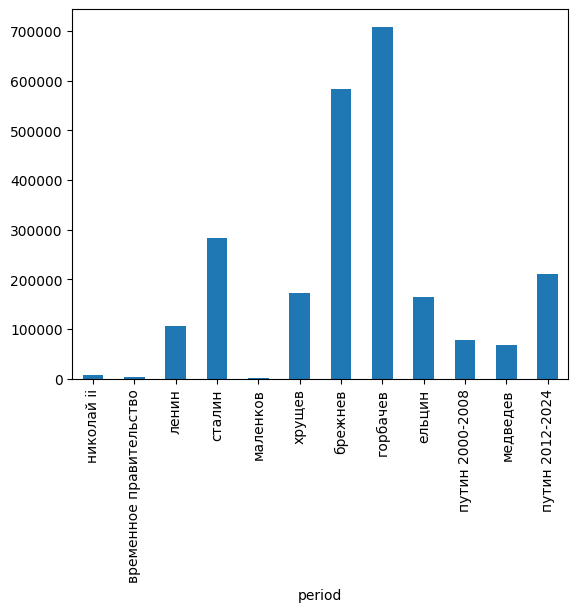

In [132]:
by_period_tc.plot.bar()

1.3 по периодам поточнее

In [133]:
# в средним текстов каждый период

df.groupby('period-denser').count()['filename'].mean()

20.11111111111111

In [134]:
# медиана текстов каждый период

df.groupby('period-denser').count()['filename'].median()

14.0

In [135]:
# среднее сумм токенов за период

df.groupby('period-denser')['token_count'].sum().mean()


132644.38888888888

In [136]:
# медиана сумм токенов за период

df.groupby('period-denser')['token_count'].sum().median()


64348.5

In [137]:
# в эти периоды больше всего текстов:

df.groupby('period-denser').count()['filename'].sort_values(ascending=False).head(10)

period-denser
ленин - революция                       87
сталин - довоенные годы                 35
ленин - поздние годы                    33
горбачев                                31
путин 2018-2024                         29
ельцин 1991-1996                        19
брежнев                                 16
путин 2012-2018                         14
сталин - великая отечественная война    14
николай ii                              14
Name: filename, dtype: int64

In [138]:
# в эти периоды больше всего токенов:

df.groupby('period-denser')['token_count'].sum().sort_values(ascending=False).head(10)

period-denser
горбачев                      708348
брежнев                       583204
сталин - довоенные годы       178968
хрущев                        173138
путин 2018-2024               135208
ельцин 1991-1996              103461
сталин - послевоенные годы     92392
путин 2012-2018                75212
медведев                       67869
ельцин 1996-1999               60828
Name: token_count, dtype: int64

In [139]:
chron_sort = df.groupby('period-denser')['date'].max().sort_values().index.to_list(
)

In [140]:
by_period_denser = df.groupby('period-denser').count().reindex(chron_sort)
by_period_denser

,filename,date,authors,genres,names,topics,multiple_authors,leader_in_authors,is_written_text,addressed_to_people,regular_occasion,has_major_topic,pattern,year,is_fragment,distorted,full_pattern,token_count,filename_raw,period
period-denser,,,,,,,,,,,,,,,,,,,,
николай ii,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
временное правительство,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
ленин - революция,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87
ленин - поздние годы,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33
сталин - довоенные годы,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35
сталин - великая отечественная война,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
сталин - послевоенные годы,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
маленков,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
хрущев,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10


<Axes: xlabel='period-denser'>

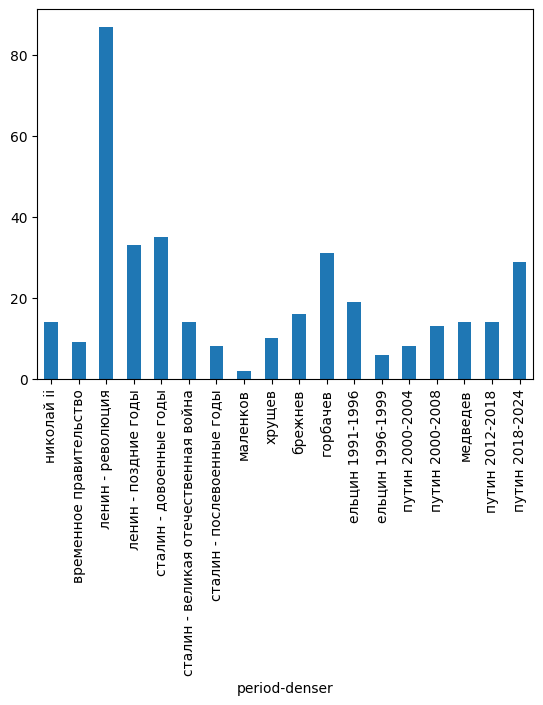

In [141]:
by_period_denser['filename'].plot.bar()

In [142]:
by_period_denser_tc = df.groupby('period-denser')['token_count'].sum().reindex(chron_sort)

by_period_denser_tc

period-denser
николай ii                                6972
временное правительство                   4570
ленин - революция                        51685
ленин - поздние годы                     53849
сталин - довоенные годы                 178968
сталин - великая отечественная война     12277
сталин - послевоенные годы               92392
маленков                                  1380
хрущев                                  173138
брежнев                                 583204
горбачев                                708348
ельцин 1991-1996                        103461
ельцин 1996-1999                         60828
путин 2000-2004                          34964
путин 2000-2008                          43274
медведев                                 67869
путин 2012-2018                          75212
путин 2018-2024                         135208
Name: token_count, dtype: int64

<Axes: xlabel='period-denser'>

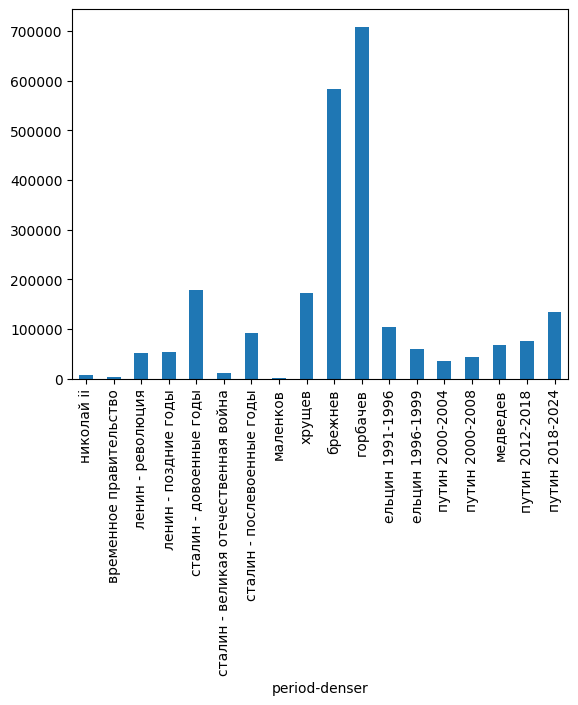

In [143]:
by_period_denser_tc.plot.bar()

In [144]:
df['pattern'] = df['multiple_authors'].astype(int).astype(str) \
+df['leader_in_authors'].astype(int).astype(str)\
+df['is_written_text'].astype(int).astype(str)\
+df['addressed_to_people'].astype(int).astype(str)
# +df['regular_occasion'].astype(int).astype(str)\
# +df['has_major_topic'].astype(int).astype(str)\
# +df['is_fragment'].astype(int).astype(str)\
# +df['distorted'].astype(int).astype(str)
df

,filename,date,authors,genres,names,topics,multiple_authors,leader_in_authors,is_written_text,addressed_to_people,...,has_major_topic,pattern,year,is_fragment,distorted,full_pattern,token_count,filename_raw,period,period-denser
0,1894.10.20_николай ii_манифест_о восшествии на...,1894.10.20,[николай ii],[манифест],[о восшествии на престол],[о восшествии на престол],False,True,True,True,...,False,0111,1894,False,False,1110000,478,1894.10.20_николай-ii_манифест_о-восшествии-на...,николай ii,николай ii
1,1896.01.01_николай ii_манифест_коронование,1896.01.01,[николай ii],[манифест],[коронование],[коронование],False,True,True,True,...,False,0111,1896,False,False,1110000,202,1896.01.01_николай-ii_манифест_коронование.txt,николай ii,николай ii
2,1899.02.03_николай ii_манифест_законы княжеств...,1899.02.03,[николай ii],[манифест],[законы княжества финляндского],[законы княжества финляндского],False,True,True,True,...,False,0111,1899,False,False,1110000,455,1899.02.03_николай-ii_манифест_законы-княжеств...,николай ii,николай ii
3,1903.02.26_николай ii_манифест_усовершенствова...,1903.02.26,[николай ii],[манифест],[усовершенствование государственной власти],[усовершенствование государственной власти],False,True,True,True,...,False,0111,1903,False,False,1110000,679,1903.02.26_николай-ii_манифест_усовершенствова...,николай ii,николай ii
4,1904.01.27_николай ii_манифест_об открытии вое...,1904.01.27,[николай ii],[манифест],[об открытии военных действий против японии],[русско японская война 1904],False,True,True,True,...,True,0111,1904,False,False,1110100,399,1904.01.27_николай-ii_манифест_об-открытии-вое...,николай ii,николай ii
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,2024.02.29_путин_выступление.послание_послание...,2024.02.29,[путин],"[выступление, послание]",[послание федеральному собранию],[послание федеральному собранию],False,True,False,False,...,False,0100,2024,False,False,1001000,15982,2024.02.29_путин_выступление.послание_послание...,путин 2012-2024,путин 2018-2024
358,2024.03.14_путин_выступление.обращение к гражд...,2024.03.14,[путин],"[выступление, обращение к гражданам, тв]",[обращение к гражданам],[выборы 2024],False,True,False,True,...,True,0101,2024,False,False,1011100,512,2024.03.14_путин_выступление.обращение-к-гражд...,путин 2012-2024,путин 2018-2024
359,2024.03.21_путин_выступление.обращение к гражд...,2024.03.21,[путин],"[выступление, обращение к гражданам, тв]",[обращение к гражданам],"[выборы 2024, итоги выборов]",False,True,False,True,...,True,0101,2024,False,False,1011100,384,2024.03.21_путин_выступление.обращение-к-гражд...,путин 2012-2024,путин 2018-2024
360,2024.03.23_путин_выступление.обращение к гражд...,2024.03.23,[путин],"[выступление, обращение к гражданам, тв]",[обращение к гражданам],[теракт в крокусе],False,True,False,True,...,True,0101,2024,False,False,1010100,667,2024.03.23_путин_выступление.обращение-к-гражд...,путин 2012-2024,путин 2018-2024


In [145]:
df['full_pattern'] = df['multiple_authors'].astype(int).astype(str) \
+df['leader_in_authors'].astype(int).astype(str)\
+df['is_written_text'].astype(int).astype(str)\
+df['addressed_to_people'].astype(int).astype(str)\
+df['regular_occasion'].astype(int).astype(str)\
+df['has_major_topic'].astype(int).astype(str)\
+df['is_fragment'].astype(int).astype(str)\
+df['distorted'].astype(int).astype(str)
df

,filename,date,authors,genres,names,topics,multiple_authors,leader_in_authors,is_written_text,addressed_to_people,...,has_major_topic,pattern,year,is_fragment,distorted,full_pattern,token_count,filename_raw,period,period-denser
0,1894.10.20_николай ii_манифест_о восшествии на...,1894.10.20,[николай ii],[манифест],[о восшествии на престол],[о восшествии на престол],False,True,True,True,...,False,0111,1894,False,False,01110000,478,1894.10.20_николай-ii_манифест_о-восшествии-на...,николай ii,николай ii
1,1896.01.01_николай ii_манифест_коронование,1896.01.01,[николай ii],[манифест],[коронование],[коронование],False,True,True,True,...,False,0111,1896,False,False,01110000,202,1896.01.01_николай-ii_манифест_коронование.txt,николай ii,николай ii
2,1899.02.03_николай ii_манифест_законы княжеств...,1899.02.03,[николай ii],[манифест],[законы княжества финляндского],[законы княжества финляндского],False,True,True,True,...,False,0111,1899,False,False,01110000,455,1899.02.03_николай-ii_манифест_законы-княжеств...,николай ii,николай ii
3,1903.02.26_николай ii_манифест_усовершенствова...,1903.02.26,[николай ii],[манифест],[усовершенствование государственной власти],[усовершенствование государственной власти],False,True,True,True,...,False,0111,1903,False,False,01110000,679,1903.02.26_николай-ii_манифест_усовершенствова...,николай ii,николай ii
4,1904.01.27_николай ii_манифест_об открытии вое...,1904.01.27,[николай ii],[манифест],[об открытии военных действий против японии],[русско японская война 1904],False,True,True,True,...,True,0111,1904,False,False,01110100,399,1904.01.27_николай-ii_манифест_об-открытии-вое...,николай ii,николай ii
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,2024.02.29_путин_выступление.послание_послание...,2024.02.29,[путин],"[выступление, послание]",[послание федеральному собранию],[послание федеральному собранию],False,True,False,False,...,False,0100,2024,False,False,01001000,15982,2024.02.29_путин_выступление.послание_послание...,путин 2012-2024,путин 2018-2024
358,2024.03.14_путин_выступление.обращение к гражд...,2024.03.14,[путин],"[выступление, обращение к гражданам, тв]",[обращение к гражданам],[выборы 2024],False,True,False,True,...,True,0101,2024,False,False,01011100,512,2024.03.14_путин_выступление.обращение-к-гражд...,путин 2012-2024,путин 2018-2024
359,2024.03.21_путин_выступление.обращение к гражд...,2024.03.21,[путин],"[выступление, обращение к гражданам, тв]",[обращение к гражданам],"[выборы 2024, итоги выборов]",False,True,False,True,...,True,0101,2024,False,False,01011100,384,2024.03.21_путин_выступление.обращение-к-гражд...,путин 2012-2024,путин 2018-2024
360,2024.03.23_путин_выступление.обращение к гражд...,2024.03.23,[путин],"[выступление, обращение к гражданам, тв]",[обращение к гражданам],[теракт в крокусе],False,True,False,True,...,True,0101,2024,False,False,01010100,667,2024.03.23_путин_выступление.обращение-к-гражд...,путин 2012-2024,путин 2018-2024


2. по жанрам/паттернам



In [146]:
# самые популярные жанры по количеству текстов

df.groupby(by=['pattern']).count().sort_values(by=['filename'], ascending=False)['filename']

pattern
1010    113
0100     82
0111     36
0101     30
0110     29
1110     29
1000     19
1011     10
1111      7
0000      6
0010      1
Name: filename, dtype: int64

самые популярные жанры:

1. письменные документы коллективного авторства без лидера направленные политикам 

2. устные сольные выступления лидера адресованные политикам

3. письменные сольные тексты лидера политикам

4. устные сольные обращения лидера к гражданам

5. письменные коллективные документы в тч с лидером, не напрямую к гражданам

6. коллективные обсуждения/прения/обращения политиков политикам

7. тексты/статьи лидера обращенные широкой аудитории

8. коллективные воззвания итд, от всех политиков + лидера широкой публике

9. устные сольные выступления не-лидеров

10. письменный сольный документ не-лидера


выводы/предположения:



считаем что коллективное авторство с лидером и без эквивалентны? 1.=5.?

считаем что устные выступления лидера и не-лидеры равны? 2. 4. 9.

письменная статья лидера туда же? программные статьи а также мысли/записки



1,5

2,4,9


3,6,7,8,10

новая идея: может не разделять друг от друга а просто смотреть в разрезах:

1. все тексты от лидера
2. устные выступления лидера и не-лидеров
3. все обращения напрямую к гражданам

итд? на подумать на ближайшее время

распределение текстов по годам и по паттернам

<Axes: xlabel='year'>

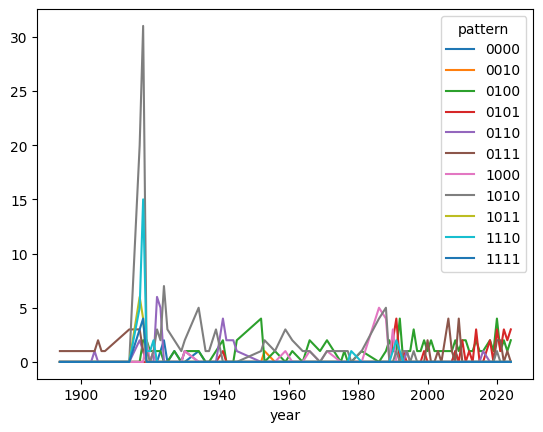

In [147]:
df.groupby(by=['year','pattern']).count()

grouped_by_year_by_pattern = df.groupby(by=['year','pattern']).count()
grouped_by_year_by_pattern.pivot_table(values="filename",index="year",columns="pattern").fillna(0).plot()

In [148]:
top_5_patterns = df.groupby(by=['pattern']).count().sort_values(by=['filename'], ascending=False)['filename'].index.to_list()[:5]
top_5_patterns

['1010', '0100', '0111', '0101', '0110']

<Axes: xlabel='year'>

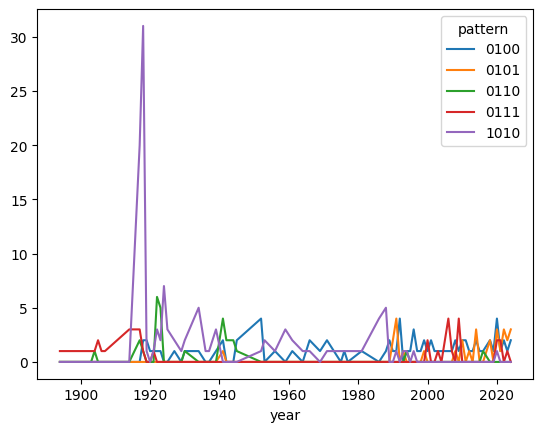

In [149]:
count_by_top_5_patters_by_year = df[
    df['pattern'].isin(top_5_patterns)
].groupby(by=['year','pattern']).count()

grouped_by_year_by_pattern = count_by_top_5_patters_by_year
grouped_by_year_by_pattern.pivot_table(values="filename",index="year",columns="pattern").fillna(0).plot()

распределение по годам для топ-5 паттернов

2.1 по паттернам по токенам

In [150]:
# самые популярные жанры по количеству текстов

df.groupby(by=['pattern'])['token_count'].sum().sort_values(ascending=False)

pattern
1000    1010137
0100     871106
1010     338154
0101      55708
0111      50755
0110      22511
1110      20467
0000       6888
1011       5808
1111       5277
0010        788
Name: token_count, dtype: int64

больше всего токенов в жанрах:

1. коллективные устные прения итд (обсуждения на съездах итд)
2. устные выступления лидеров (на съездах итд)
3. письменные коллективные документы без лидера политикам (постановления итд)
4. устное обращение лидера к гражданам
5. письменное обращение лидера к гражданам

In [204]:
df[
    df['pattern'] == '0111'
]

,filename,date,authors,genres,names,topics,multiple_authors,leader_in_authors,is_written_text,addressed_to_people,...,has_major_topic,pattern,year,is_fragment,distorted,full_pattern,token_count,filename_raw,period,period-denser
0,1894.10.20_николай ii_манифест_о восшествии на...,1894.10.20,[николай ii],[манифест],[о восшествии на престол],[о восшествии на престол],False,True,True,True,...,False,0111,1894,False,False,0111000,478,1894.10.20_николай-ii_манифест_о-восшествии-на...,николай ii,николай ii
1,1896.01.01_николай ii_манифест_коронование,1896.01.01,[николай ii],[манифест],[коронование],[коронование],False,True,True,True,...,False,0111,1896,False,False,0111000,202,1896.01.01_николай-ii_манифест_коронование.txt,николай ii,николай ii
2,1899.02.03_николай ii_манифест_законы княжеств...,1899.02.03,[николай ii],[манифест],[законы княжества финляндского],[законы княжества финляндского],False,True,True,True,...,False,0111,1899,False,False,0111000,455,1899.02.03_николай-ii_манифест_законы-княжеств...,николай ii,николай ii
3,1903.02.26_николай ii_манифест_усовершенствова...,1903.02.26,[николай ii],[манифест],[усовершенствование государственной власти],[усовершенствование государственной власти],False,True,True,True,...,False,0111,1903,False,False,0111000,679,1903.02.26_николай-ii_манифест_усовершенствова...,николай ii,николай ii
4,1904.01.27_николай ii_манифест_об открытии вое...,1904.01.27,[николай ii],[манифест],[об открытии военных действий против японии],[русско японская война 1904],False,True,True,True,...,True,0111,1904,False,False,0111010,399,1904.01.27_николай-ii_манифест_об-открытии-вое...,николай ii,николай ii
6,1905.08.06_николай ii_манифест_учреждение госд...,1905.08.06,[николай ii],[манифест],[учреждение госдумы 1],[учреждение госдумы 1],False,True,True,True,...,False,0111,1905,False,False,0111000,582,1905.08.06_николай-ii_манифест_учреждение-госд...,николай ii,николай ii
7,1905.10.17_николай ii_манифест_об усовершенств...,1905.10.17,[николай ii],[манифест],[об усовершенствовании государственного порядка],[революция 1905],False,True,True,True,...,True,0111,1905,False,False,0111010,392,1905.10.17_николай-ii_манифест_об-усовершенств...,николай ii,николай ii
8,1906.07.06_николай ii_манифест_роспуск думы 1,1906.07.06,[николай ii],[манифест],[роспуск думы 1],[роспуск думы 1],False,True,True,True,...,False,0111,1906,False,False,0111000,518,1906.07.06_николай-ii_манифест_роспуск-думы-1.txt,николай ii,николай ii
9,1907.06.03_николай ii_манифест_роспуск думы 2,1907.06.03,[николай ii],[манифест],[роспуск думы 2],[роспуск думы 2],False,True,True,True,...,False,0111,1907,False,False,0111000,846,1907.06.03_николай-ii_манифест_роспуск-думы-2.txt,николай ii,николай ii
10,1914.07.20_николай ii_манифест_об объявлении в...,1914.07.20,[николай ii],[манифест],[об объявлении военных действий между россией ...,[1 мировая война],False,True,True,True,...,True,0111,1914,False,False,0111010,849,1914.07.20_николай-ii_манифест_об-объявлении-в...,николай ii,николай ii


In [209]:
df.groupby(by=['pattern'])['token_count'].sum().sort_values(ascending=False)

pattern
1000    1010137
0100     871106
1010     338154
0101      55708
0111      50755
0110      22511
1110      20467
0000       6888
1011       5808
1111       5277
0010        788
Name: token_count, dtype: int64

In [205]:
top_5_patterns = df.groupby(by=['pattern'])['token_count'].sum().sort_values(ascending=False).index.to_list()[:5]
top_5_patterns

['1000', '0100', '1010', '0101', '0111']

<Axes: xlabel='year'>

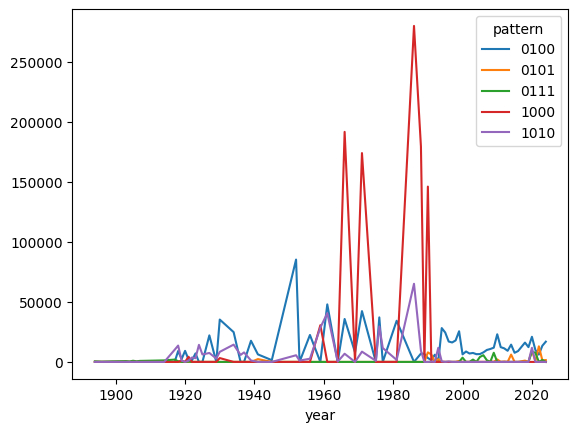

In [206]:
count_by_top_5_patters_by_year = pd.DataFrame(df[
    df['pattern'].isin(top_5_patterns)
].groupby(by=['year','pattern'])['token_count'].sum())

grouped_by_year_by_pattern = count_by_top_5_patters_by_year
grouped_by_year_by_pattern.pivot_table(values="token_count",index="year",columns="pattern").fillna(0).plot()

In [207]:
df.groupby(by=['pattern']).count().sort_values(by=['filename'], ascending=False)['filename'].index.to_list()[:5]

['1010', '0100', '0111', '0101', '0110']

In [208]:
df.groupby(by=['pattern'])['token_count'].sum().sort_values(ascending=False).index.to_list()[:5]

['1000', '0100', '1010', '0101', '0111']

пересекающиеся жанры:

0100 устное обращение лидера к политикам (на съезде итд)
1010 письменный безлидерный коллективный внутриполитический текст (в тч декрет, постановление итд)
0101 устное обращение лидера к гражданам
0111 письменное обращение лидера к гражданам

подумать: может получится сплющить еще
подумать: нормализация?